In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [45]:
runner = pd.read_csv("../../../output/data_clean/cleaned_runner.csv", index_col=0)
race = pd.read_csv("../../../output/data_clean/cleaned_race.csv", index_col= 0)
runner.age_range = pd.Categorical(
    runner.age_range, categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)
runner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130137 entries, 0 to 137802
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   race_year_id     130137 non-null  int64   
 1   ranking          113523 non-null  float64 
 2   runner           130137 non-null  object  
 3   time             113523 non-null  object  
 4   age              128764 non-null  float64 
 5   gender           130108 non-null  object  
 6   nationality      130137 non-null  object  
 7   time_in_seconds  113523 non-null  float64 
 8   age_range        130137 non-null  category
 9   speed            113523 non-null  float64 
 10  runner_id        130108 non-null  object  
dtypes: category(1), float64(4), int64(1), object(5)
memory usage: 11.0+ MB


In [46]:
df = pd.merge(runner, race, left_on="race_year_id", right_on="race_year_id", how="left")
df = df.loc[df.age_range != "Undefined"]
df = df.loc[df.speed < 20]
df = df.loc[df.distance > 150]

In [47]:
one_hot = pd.get_dummies(df['gender'], prefix = "gender")
# Drop column B as it is now encoded
df = df.drop('gender',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110748 entries, 0 to 130136
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   race_year_id     110748 non-null  int64   
 1   ranking          110748 non-null  float64 
 2   runner           110748 non-null  object  
 3   time             110748 non-null  object  
 4   age              110748 non-null  float64 
 5   nationality      110748 non-null  object  
 6   time_in_seconds  110748 non-null  float64 
 7   age_range        110748 non-null  category
 8   speed            110748 non-null  float64 
 9   runner_id        110723 non-null  object  
 10  event            110748 non-null  object  
 11  race             110748 non-null  object  
 12  country          110748 non-null  object  
 13  participation    110748 non-null  object  
 14  distance         110748 non-null  float64 
 15  elevation_gain   110748 non-null  float64 
 16  elevation_loss   110

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

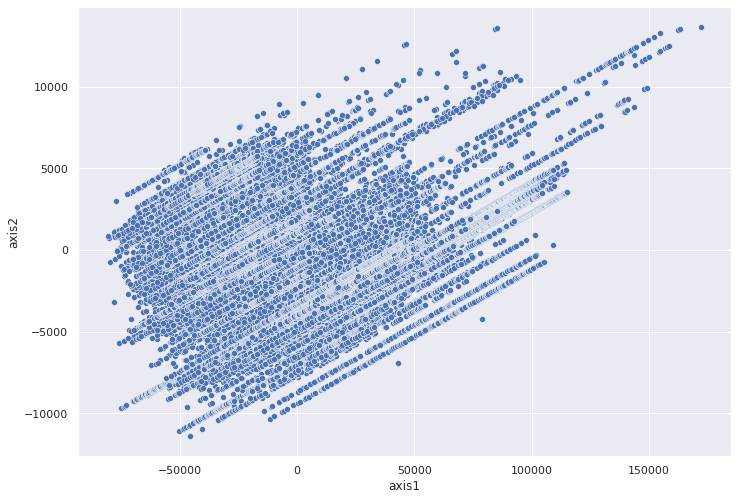

In [50]:
dfquant = df[["ranking","age","participants","distance","elevation_gain","elevation_loss","month","gender_M","gender_W"]]

cls = PCA(n_components=4)
pcs = cls.fit_transform(dfquant)

X = pd.DataFrame(pcs, columns=["axis1", "axis2","axis3", "axis4"])
X.index = dfquant.index
#X = pd.concat([X, join.age_range], axis=1)


sns.scatterplot(x = "axis1", y = "axis2",data = X)

In [ ]:
means_speed_male = join_male.groupby(['distance']).mean()